# Fun with NumPy: Image Processing

## Table of Contents
1. Introduction
2. Install & Import Packages
3. Display Image from Url
4. Convert to Numpy Array
5. Mask
6. Blue Stripe
7. Green Filter
8. Negative
9. Concatenate

## 1. Introduction

Today, let's do something fun. We've traditionally used Numpy to work with math operations and arrays. Numpy arrays can also be thought of as representations of images as arrays of pixels represented by 8-bit integers. Black-and-white images are simple 2-dimensional arrays with integers ranging from 0 (black) to 255 (white). Color images are 3-dimensional arrays where each pixel is a vector of values for red, green, and blue. Let's take an image of a random handsome chap. After converting it to a numpy array, we can edit it using numpy functions and methods and render and display images using Python Image Library (PIL). The purpose is to show a fun way to demonstrate simple numpy multi-dimensional arrays functions annd methods using arrays as an abstraction for images. Let's dive in. 

## 2. Install & Import Packages

In [196]:
import numpy as np

# Displaying image from url using Python Image Library (PIL)
import PIL
from PIL import Image
from IPython.display import display
import requests 
import urllib.request
from urllib.request import urlopen
import io

## 3. Display Image from Url

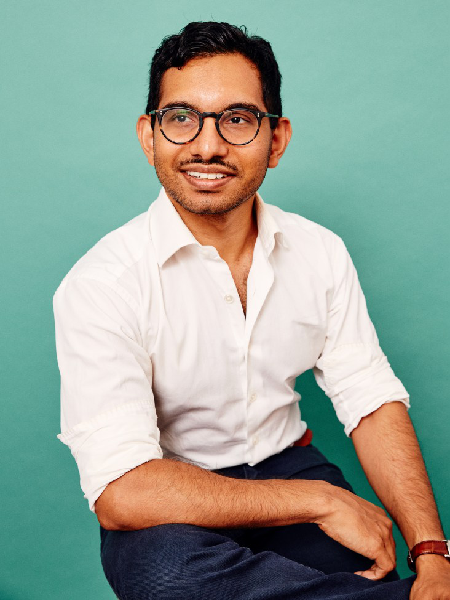

In [199]:
# Display image from url using requests, urllib, and PIL, resize to 450 (W) x 600 (H) pixels
url = "https://i1.wp.com/crawstat.com/wp-content/uploads/2020/05/180615_DALIA_PORTRAITS-10.jpg?resize=732%2C1024&ssl=1"
response = requests.get(url)
image_bytes = io.BytesIO(response.content)
img = PIL.Image.open(image_bytes)
dim = (450,600)
img = img.resize(dim)
display(img)

## 4. Convert to Numpy Array

Converting the image to an array, we have a 3-dimensional array with dimensions (600,450,3) meaning 600 row pixels x 450 column pixels and 3 channels (red, green, and blue). The data type is uint8, or unsigned (non-negative) 8-bit integers, with each value going up to 2^8 (we start at zero so they range from 0 to 255). 

In [200]:
# Now, we can conver this PIL image to a numpy array
array = np.array(img)
array

array([[[139, 191, 179],
        [138, 190, 178],
        [139, 191, 179],
        ...,
        [135, 189, 176],
        [135, 189, 176],
        [135, 189, 176]],

       [[141, 193, 181],
        [139, 191, 179],
        [141, 193, 181],
        ...,
        [134, 188, 175],
        [135, 189, 176],
        [136, 190, 177]],

       [[140, 192, 180],
        [137, 189, 177],
        [140, 192, 180],
        ...,
        [134, 188, 175],
        [134, 188, 175],
        [135, 189, 176]],

       ...,

       [[ 19, 112, 102],
        [ 20, 113, 103],
        [ 23, 116, 105],
        ...,
        [173,  80,  46],
        [176,  82,  46],
        [181,  87,  49]],

       [[ 16, 109,  99],
        [ 23, 116, 106],
        [ 23, 116, 106],
        ...,
        [157,  64,  31],
        [168,  73,  41],
        [175,  78,  43]],

       [[ 12, 105,  95],
        [ 17, 110, 100],
        [ 14, 110,  99],
        ...,
        [158,  63,  33],
        [155,  60,  28],
        [173,  76,  43]]

In [201]:
# Check shape, we have a 3-dimensional array of 600 pixels x 450 pixels and 3 channels (red, green, blue) since it's a color image. 
array.shape

(600, 450, 3)

## 5. Mask

In [203]:
# Mask array of same shape as above array filled with color value 50 using np.full
mask = np.full(array.shape, 50)
mask

array([[[50, 50, 50],
        [50, 50, 50],
        [50, 50, 50],
        ...,
        [50, 50, 50],
        [50, 50, 50],
        [50, 50, 50]],

       [[50, 50, 50],
        [50, 50, 50],
        [50, 50, 50],
        ...,
        [50, 50, 50],
        [50, 50, 50],
        [50, 50, 50]],

       [[50, 50, 50],
        [50, 50, 50],
        [50, 50, 50],
        ...,
        [50, 50, 50],
        [50, 50, 50],
        [50, 50, 50]],

       ...,

       [[50, 50, 50],
        [50, 50, 50],
        [50, 50, 50],
        ...,
        [50, 50, 50],
        [50, 50, 50],
        [50, 50, 50]],

       [[50, 50, 50],
        [50, 50, 50],
        [50, 50, 50],
        ...,
        [50, 50, 50],
        [50, 50, 50],
        [50, 50, 50]],

       [[50, 50, 50],
        [50, 50, 50],
        [50, 50, 50],
        ...,
        [50, 50, 50],
        [50, 50, 50],
        [50, 50, 50]]])

In [218]:
# Masked array is our original array minus the mask we created above
masked_array = array-mask

# Convert all negative values to positive values
masked_array = masked_array*-1

# Set datatype to unint8 (needed to display image)
masked_array = masked_array.astype(np.uint8)
masked_array

array([[[167, 115, 127],
        [168, 116, 128],
        [167, 115, 127],
        ...,
        [171, 117, 130],
        [171, 117, 130],
        [171, 117, 130]],

       [[165, 113, 125],
        [167, 115, 127],
        [165, 113, 125],
        ...,
        [172, 118, 131],
        [171, 117, 130],
        [170, 116, 129]],

       [[166, 114, 126],
        [169, 117, 129],
        [166, 114, 126],
        ...,
        [172, 118, 131],
        [172, 118, 131],
        [171, 117, 130]],

       ...,

       [[ 31, 194, 204],
        [ 30, 193, 203],
        [ 27, 190, 201],
        ...,
        [133, 226,   4],
        [130, 224,   4],
        [125, 219,   1]],

       [[ 34, 197, 207],
        [ 27, 190, 200],
        [ 27, 190, 200],
        ...,
        [149, 242,  19],
        [138, 233,   9],
        [131, 228,   7]],

       [[ 38, 201, 211],
        [ 33, 196, 206],
        [ 36, 196, 207],
        ...,
        [148, 243,  17],
        [151, 246,  22],
        [133, 230,   7]]

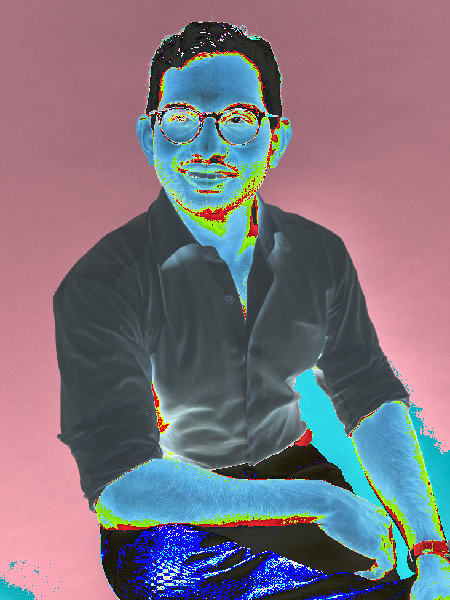

In [219]:
# Display image from array using the PIL function .fromarray() that converts an numpy array to a renderable object 
display(Image.fromarray(masked_array))

## 6. Blue Stripe

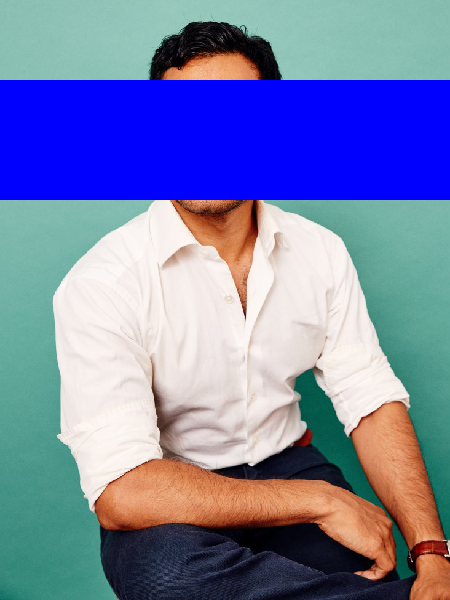

In [209]:
# New array from the original image
array_blue_stripe = np.array(img)

# Set rows 80 to 200 to blue by setting blue in the color dimensions red, green, blue to 255
array_blue_stripe[80:200] = [0,0,255]

# Display image from array using the PIL function .fromarray() that converts an numpy array to a renderable object 
display(Image.fromarray(array_blue_stripe))

## 7. Green Filter 

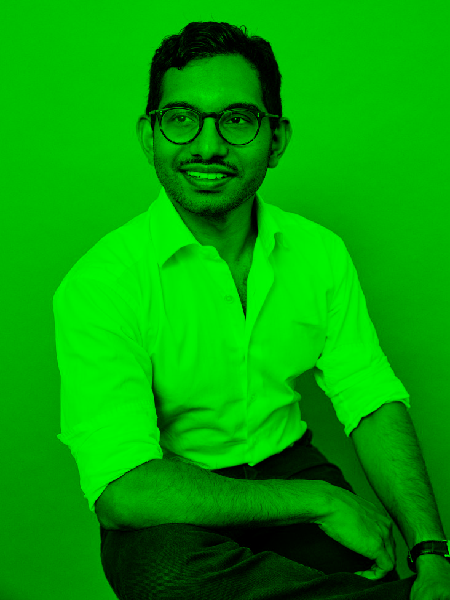

In [207]:
array_green = np.array(img)

# Set the red (index 0) and blue (index 2) pixel values of all rows and columns to 0, leaving only green 
array_green[:, :, (0, 2)] = 0

# Set datatype to unint8 (needed to display image)
array_green = array_green.astype(np.uint8)

# Display image from array using the PIL function .fromarray() that converts an numpy array to a renderable object 
display(Image.fromarray(array_green))

## 8. Negative

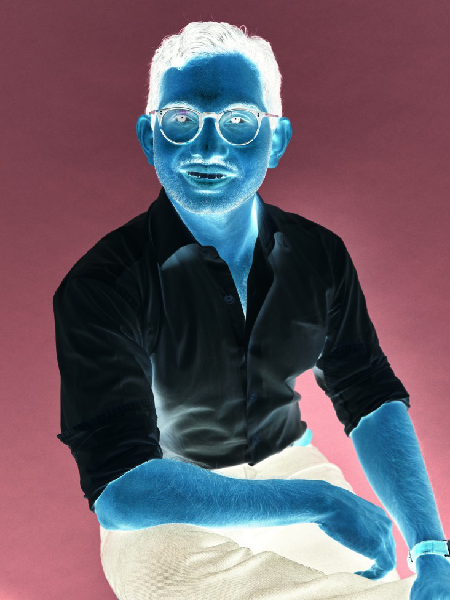

In [216]:
negative_array = np.array(img)

# Subtract pixel values from max value of 255 to generate negative 
negative = 255 - negative_array

# Set datatype to unint8 (needed to display image)
negative = negative.astype(np.uint8)

# Display image from array using the PIL function .fromarray() that converts an numpy array to a renderable object 
display(Image.fromarray(negative))

## 9. Concatenate

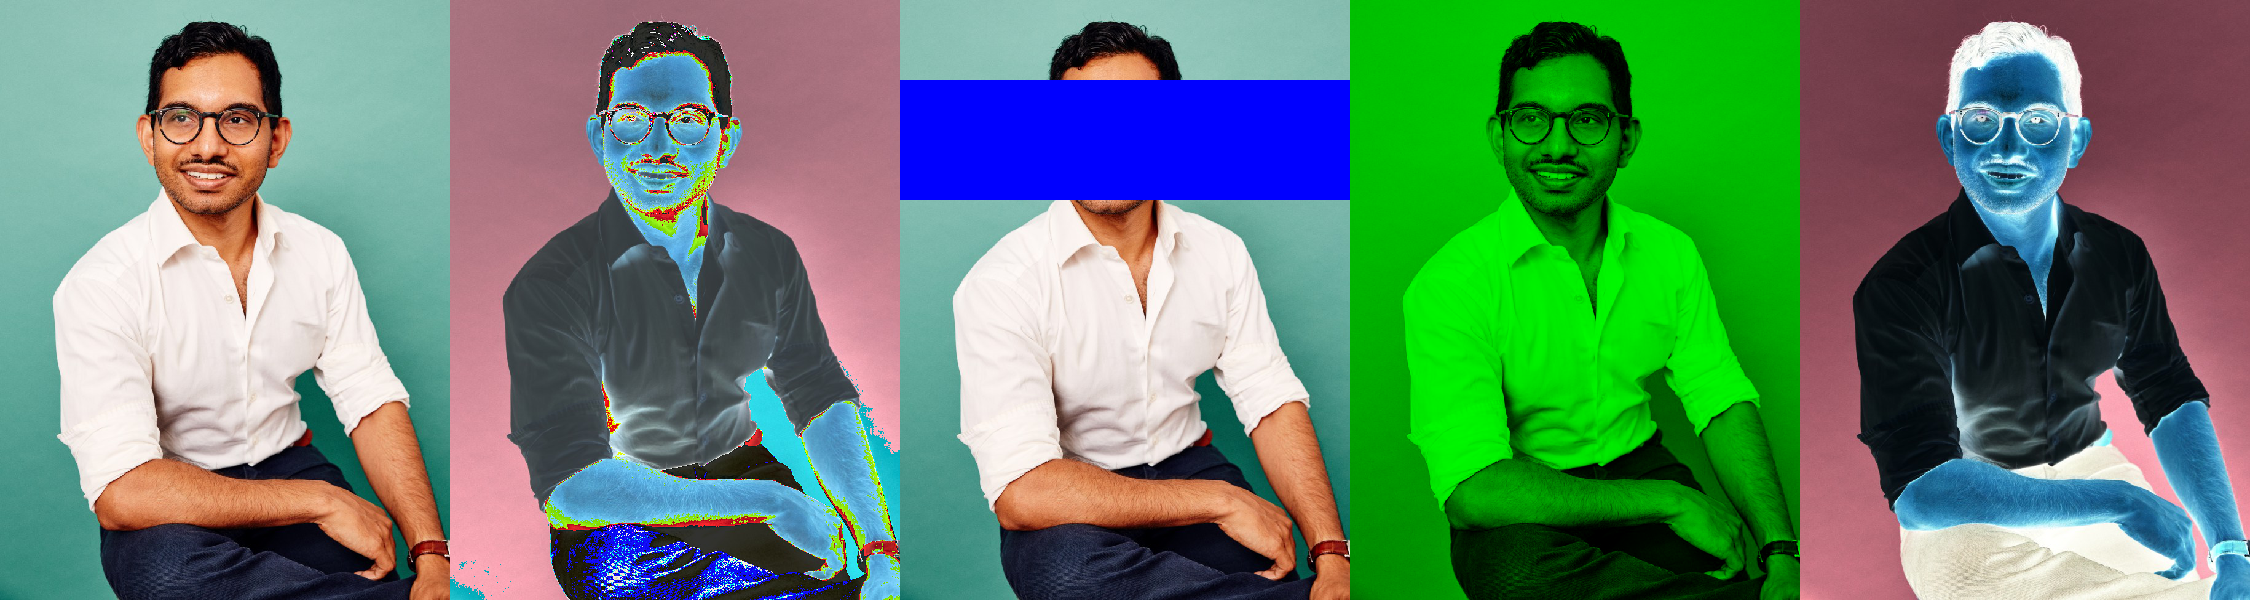

In [220]:
# Concatenate all the arrays above 
final_array = np.concatenate((array, masked_array, array_blue_stripe, array_green, negative), axis=1)

# Display image from array using the PIL function .fromarray() that converts an numpy array to a renderable object 
display(Image.fromarray(final_array))